In [1]:
# Import necessary packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
# Load the users_with_all_attributes dataframe
users_with_all_attributes = pd.read_pickle('pickle_dataframes/users_with_all_attributes.pkl')

In [3]:
# Display the dataframe
users_with_all_attributes

,Id,Reputation,CreationDate,LastAccessDate,Views,UpVotes,DownVotes,QuestionCount,AnswerCount,CommentCount,...,16,17,18,19,20,21,22,23,24,MostEngagedTopic
1,5,315,2012-12-04 20:36:06.517,2021-07-05 18:03:41.037,49,14,58,0.0,3.0,31.0,...,0.000000,0.029412,0.029412,0.000000,0.000000,0.058824,0.000000,0.000000,0.176471,3.0
2,8,2777,2012-12-04 20:52:37.450,2022-07-31 22:39:03.850,832,37,5,0.0,13.0,10.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.391304,0.000000,0.000000,0.086957,21.0
3,18,5325,2012-12-04 21:37:27.683,2013-12-18 15:57:41.670,427,110,11,16.0,20.0,65.0,...,0.000000,0.019802,0.000000,0.000000,0.000000,0.297030,0.039604,0.000000,0.237624,21.0
4,23,16227,2012-12-04 21:49:39.360,2015-02-14 02:38:09.917,1449,803,54,36.0,124.0,277.0,...,0.016018,0.016018,0.043478,0.000000,0.002288,0.096110,0.004577,0.009153,0.121281,3.0
5,26,1794,2012-12-04 21:52:54.060,2020-11-19 03:57:56.387,24,34,3,1.0,7.0,7.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,0.000000,0.000000,0.066667,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,46025,141,2023-03-19 12:16:59.447,2023-06-27 09:27:37.477,50,0,0,2.0,0.0,16.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.777778,24.0
1460,46253,251,2023-04-07 18:35:35.903,2023-07-22 21:32:54.697,6,3,9,0.0,6.0,10.0,...,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.750000,24.0
1461,46524,448,2023-05-17 19:13:21.650,2023-08-19 21:16:59.250,100,37,31,8.0,0.0,15.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.217391,0.000000,0.000000,0.260870,0.0
1462,46665,597,2023-06-07 21:14:53.120,2023-08-17 09:54:23.023,3,0,0,2.0,6.0,11.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.210526,0.000000,0.000000,0.210526,14.0


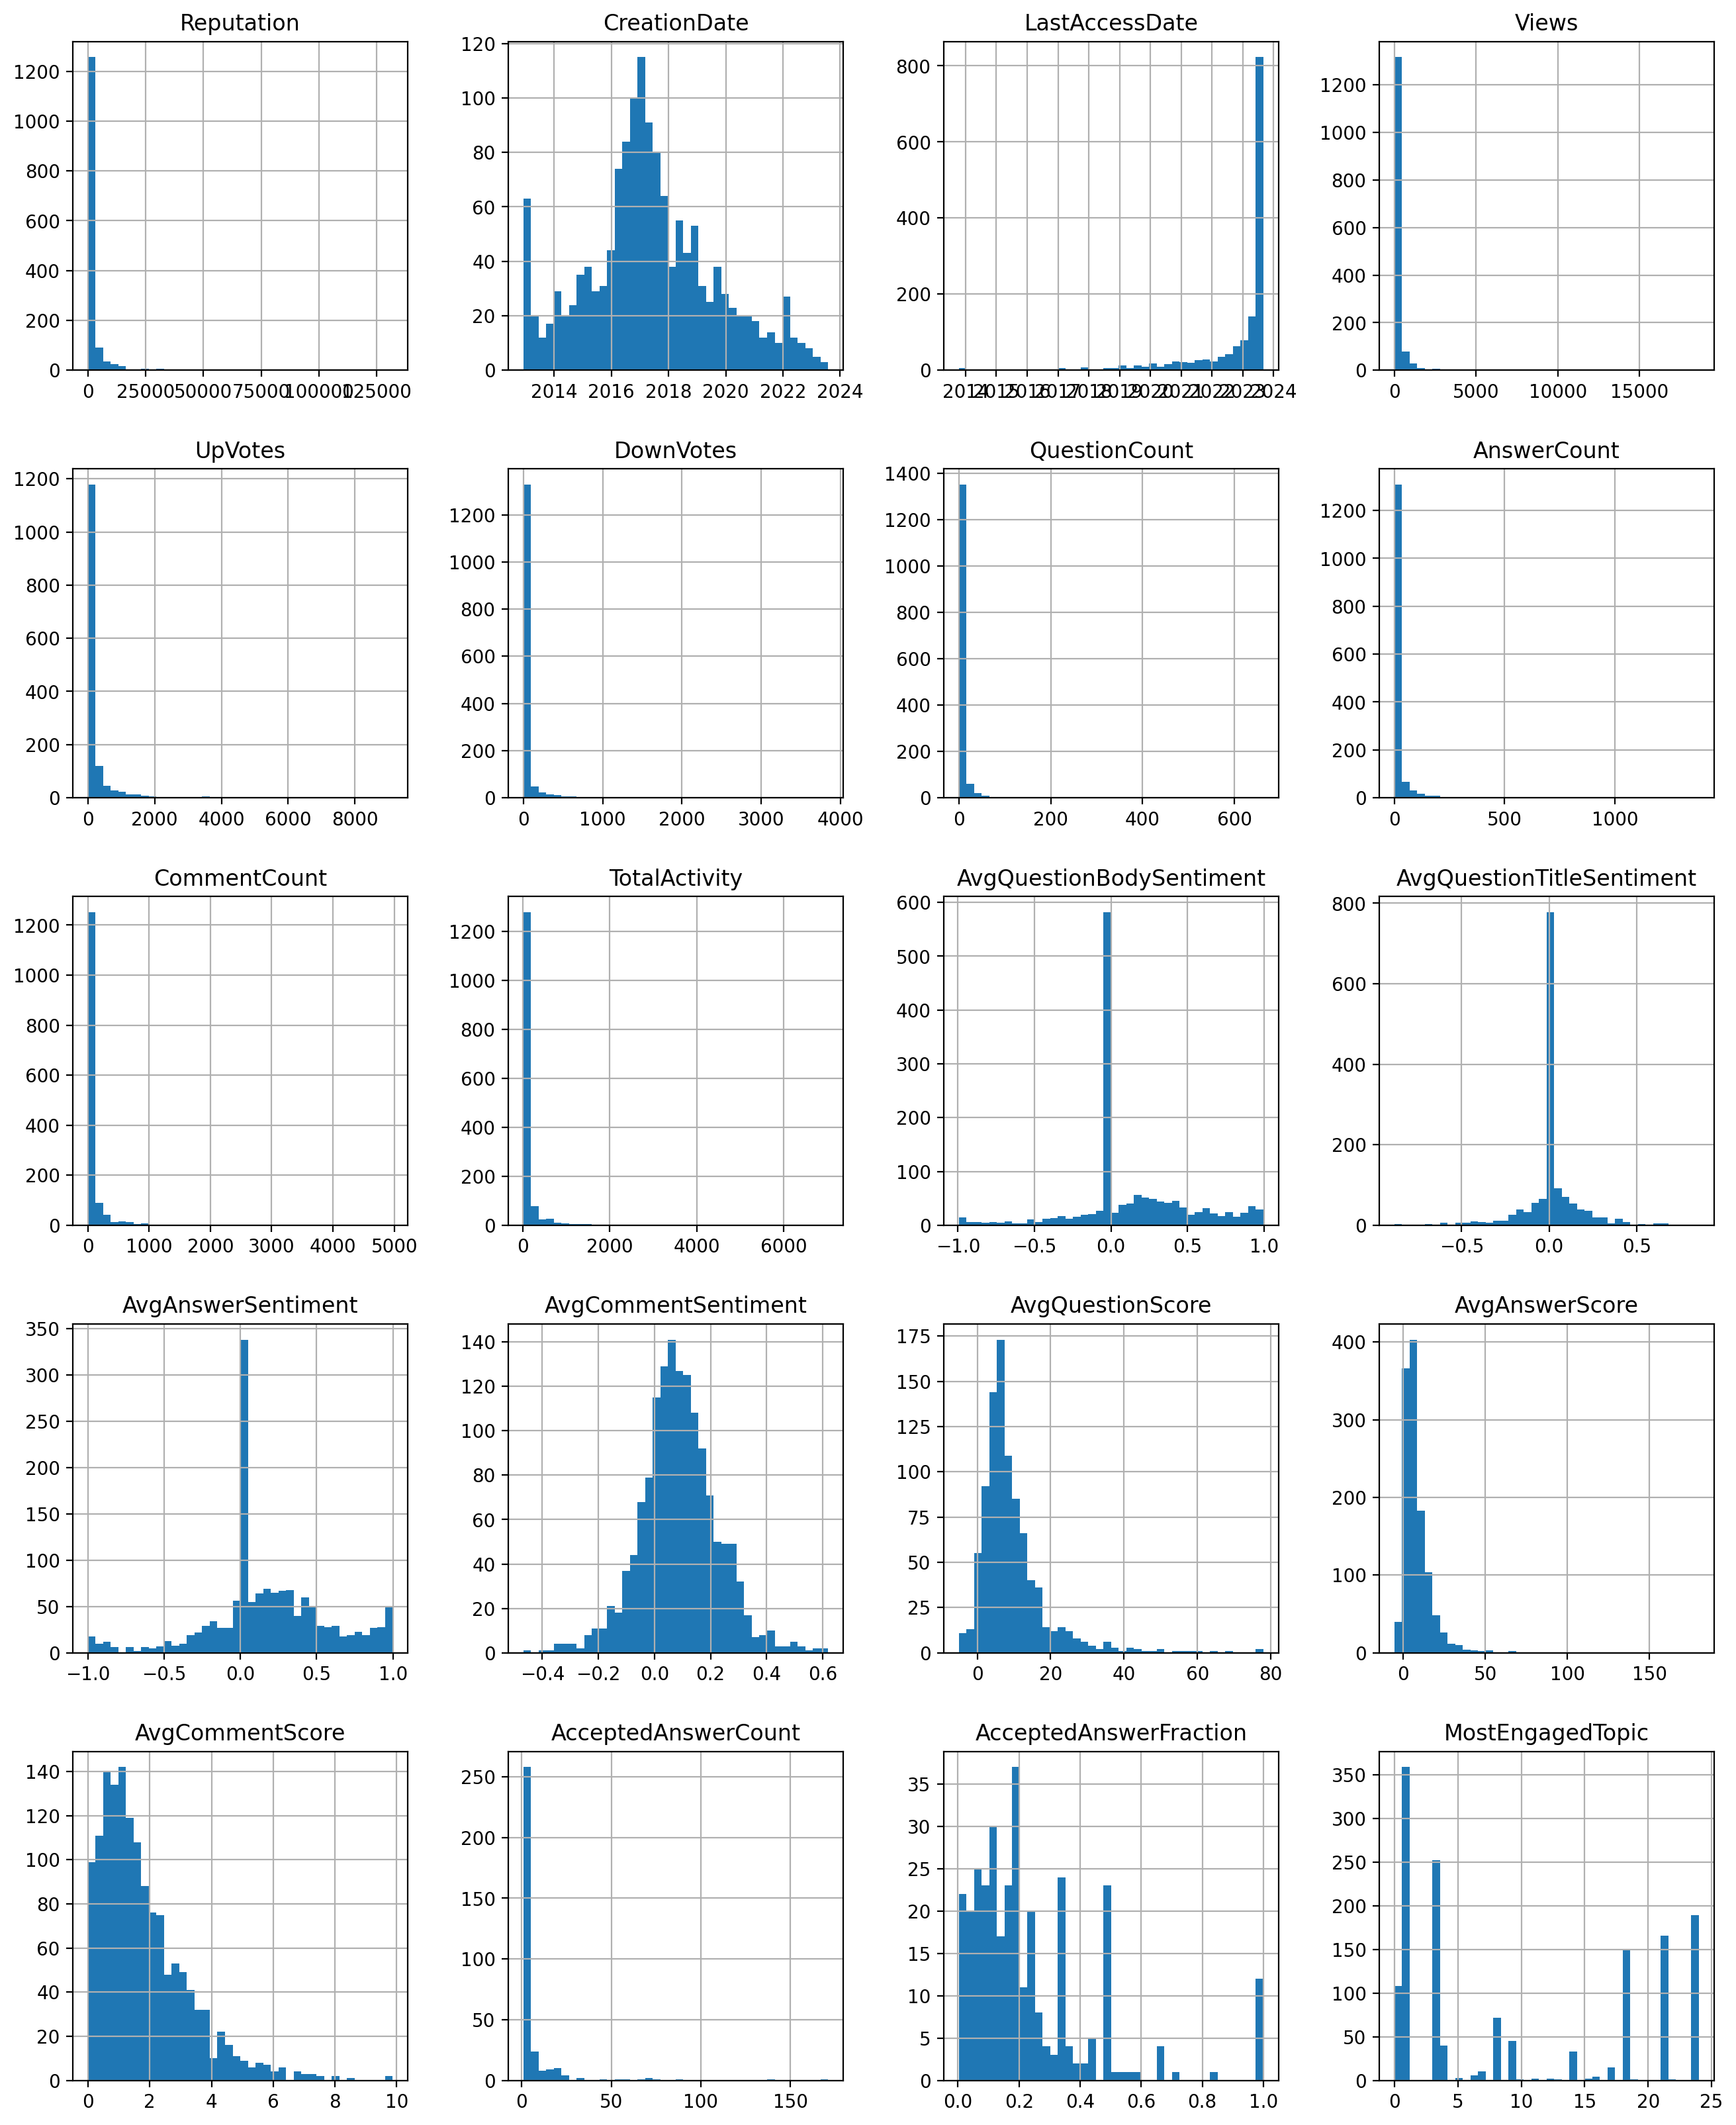

In [4]:
# Display a histogram of each column in the dataframe
users_with_all_attributes.iloc[:, 1:-26].join(users_with_all_attributes.iloc[:, -1]).hist(bins=40, figsize=(16, 20))  # Excludes the ID column and single-topic engagement columns

plt.show()

In [5]:
# Note: Set 'verbose' to True to display the Elbow Method and Silhouette Analysis plots to base clustering adjustments on
def custom_cluster(target_dataframe, clustering_features, n_clusters, cluster_label, verbose=False, random_state=42):
    # Impute NaN values with 0
    clustering_features_imputed = target_dataframe[clustering_features].fillna(0)

    # Scale features
    scaler = StandardScaler()
    scaled_clustering_features = scaler.fit_transform(clustering_features_imputed)

    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=random_state)
    kmeans.fit(scaled_clustering_features)

    # Add cluster labels to dataframe
    target_dataframe[cluster_label] = kmeans.labels_

    if verbose == True:
        # Elbow method
        wcss = []
        
        for i in range(1, 11):
            kmeans = KMeans(n_clusters=i, init='k-means++', random_state=random_state)
            kmeans.fit(scaled_clustering_features)
            wcss.append(kmeans.inertia_)
            
        fig, axs = plt.subplots(1, 2, figsize=(8, 4))
        
        axs[0].plot(range(1, 11), wcss)
        axs[0].set_xlabel('Number of Clusters')
        axs[0].set_ylabel('Within-Cluster Sum of Squares')
        axs[0].grid(True)
        axs[0].set_title('Elbow Method')

        # Silhouette analysis
        silhouette_scores = []
        
        for i in range(2, 11):
            kmeans = KMeans(n_clusters=i, init='k-means++', random_state=random_state)
            kmeans.fit(scaled_clustering_features)
            silhouette_avg = silhouette_score(scaled_clustering_features, kmeans.labels_)
            silhouette_scores.append(silhouette_avg)

        axs[1].plot(range(2, 11), silhouette_scores)
        axs[1].set_xlabel('Number of Clusters')
        axs[1].set_ylabel('Silhouette Score')
        axs[1].grid(True)
        axs[1].set_title('Silhouette Analysis')

        plt.tight_layout()
        plt.show()

        # Display feature distributions between clusters
        num_features = len(clustering_features)
        num_rows = num_features // 5 + (1 if num_features % 5 > 0 else 0)
        num_cols = 5 if num_features >= 5 else num_features
        subplot_width = 4
        subplot_height = 4
        fig_width = subplot_width * num_cols
        fig_height = subplot_height * num_rows
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), constrained_layout=True)
        
        axs = axs.ravel()
        for i in range(len(axs)):
            if i < num_features:
                sns.boxplot(x=cluster_label, y=clustering_features[i], data=target_dataframe, ax=axs[i])
                axs[i].set_title(f'Distribution of {clustering_features[i]}')
                axs[i].set_xlabel('Cluster')
                axs[i].set_ylabel('Count')
            else:
                axs[i].set_visible(False)

        plt.show()

        # Display cluster information
        cluster_counts = target_dataframe[cluster_label].value_counts().sort_index()
        cluster_stats = pd.DataFrame(target_dataframe.groupby(cluster_label)[clustering_features].mean().add_suffix('Mean')).reset_index(drop=True)
        
        cluster_info = pd.concat([cluster_counts, cluster_stats], axis=1)
        cluster_info.rename(columns={cluster_label: 'Count', 'count': 'Count'}, inplace=True)
        cluster_info.index.name = 'Cluster'
        
        print(cluster_info)

### 1. Clustering by Activity Metrics

#### 1.1 Clustering by question count, answer count, and comment count

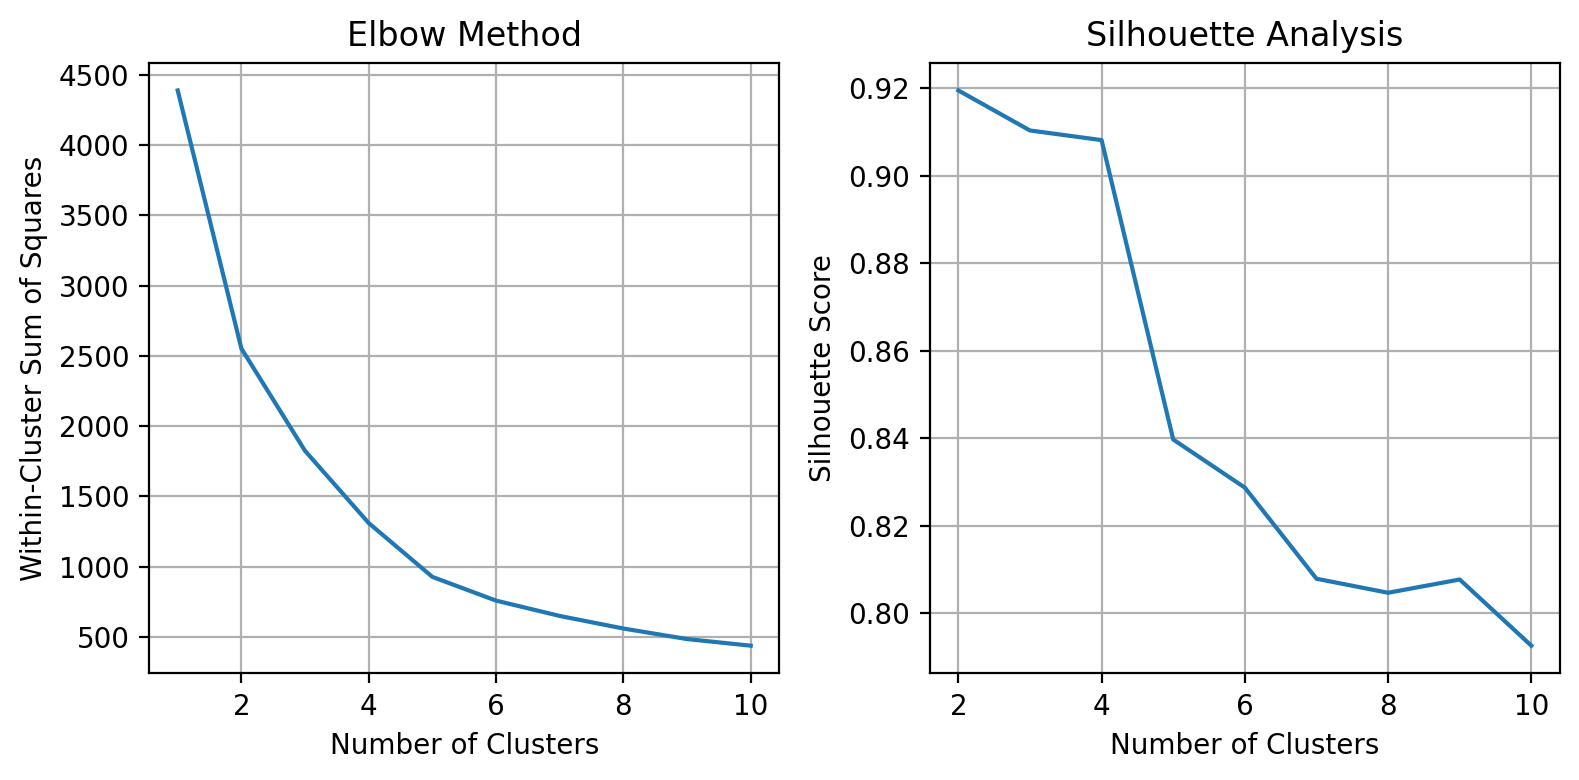

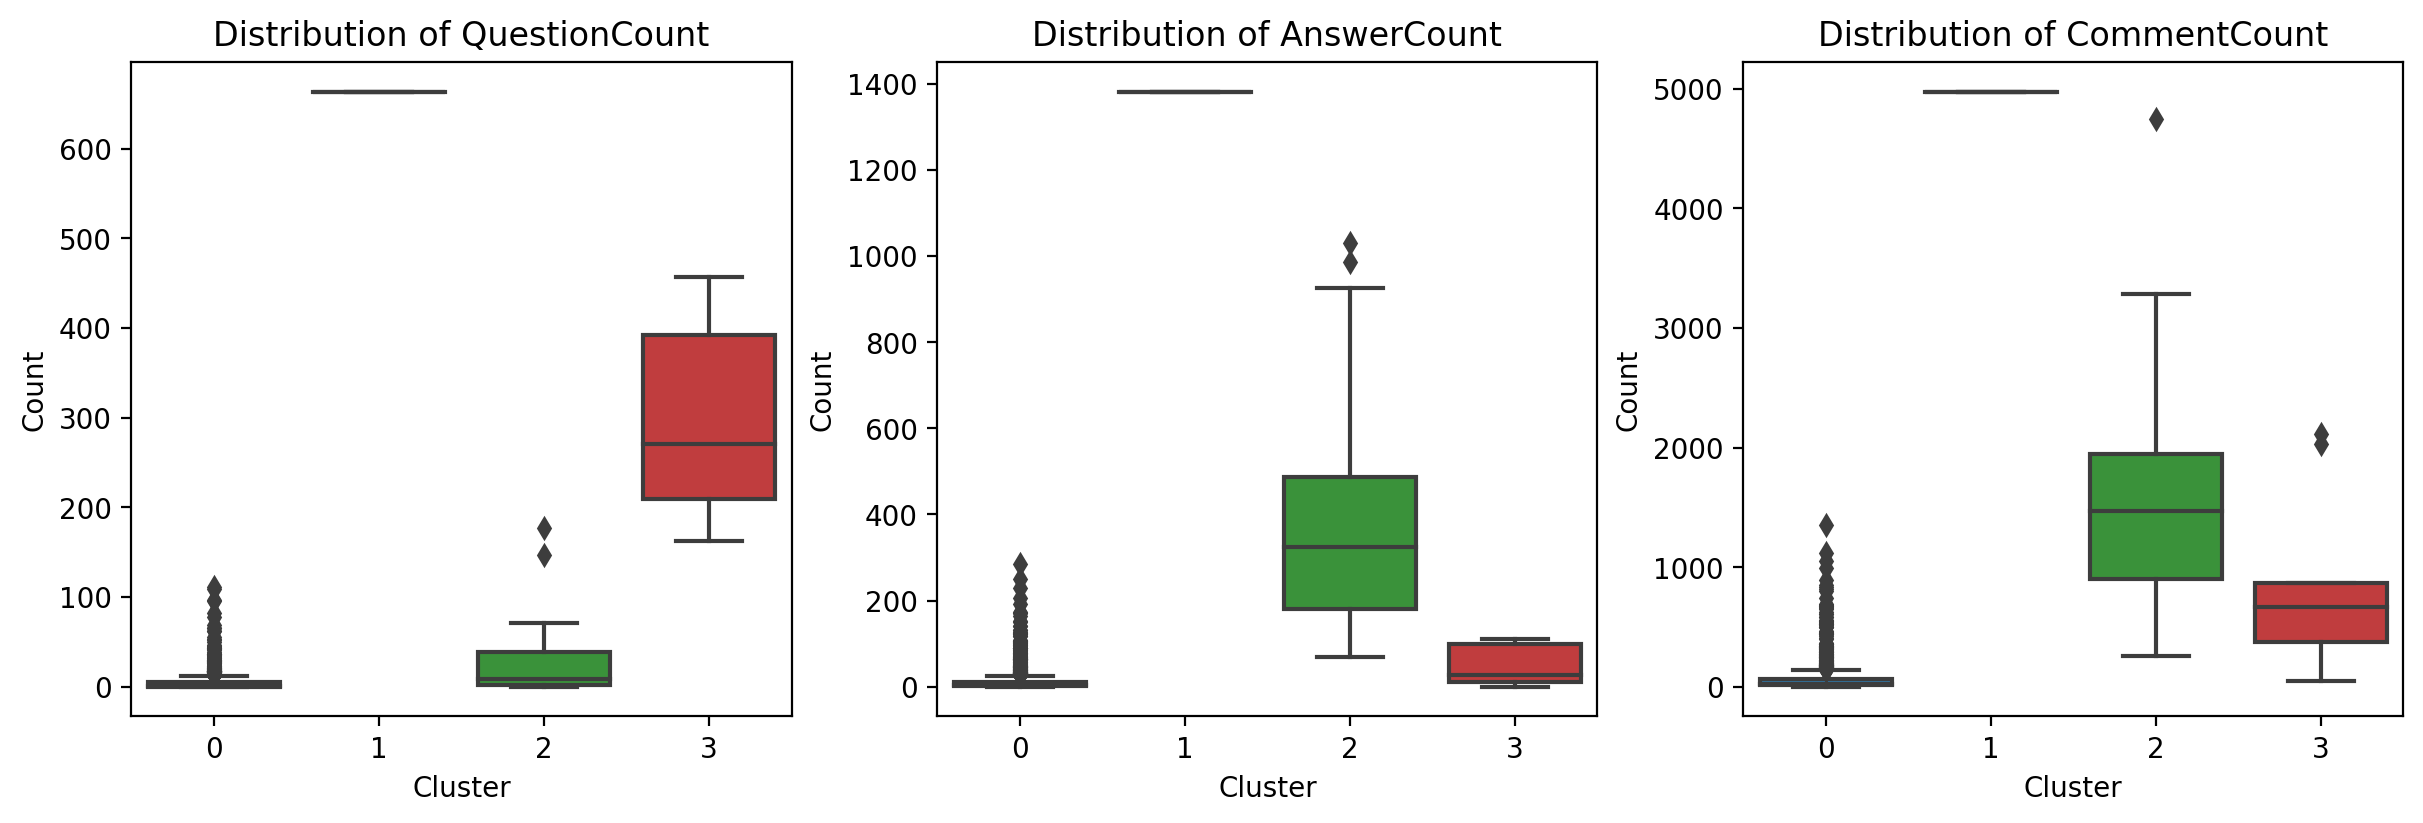

         Count  QuestionCountMean  AnswerCountMean  CommentCountMean
Cluster                                                             
0         1424           4.517556        12.245787         70.413624
1            1         663.000000      1381.000000       4972.000000
2           29          27.827586       381.344828       1565.896552
3            9         294.555556        52.666667        845.555556


In [6]:
clustering_features = ['QuestionCount', 'AnswerCount', 'CommentCount']

custom_cluster(users_with_all_attributes, clustering_features, 4, 'ActivityCluster', verbose=True)

### 2. Clustering by Quality Metrics

#### 2.1 Clustering by reputation, average question score, average answer score, and average comment score

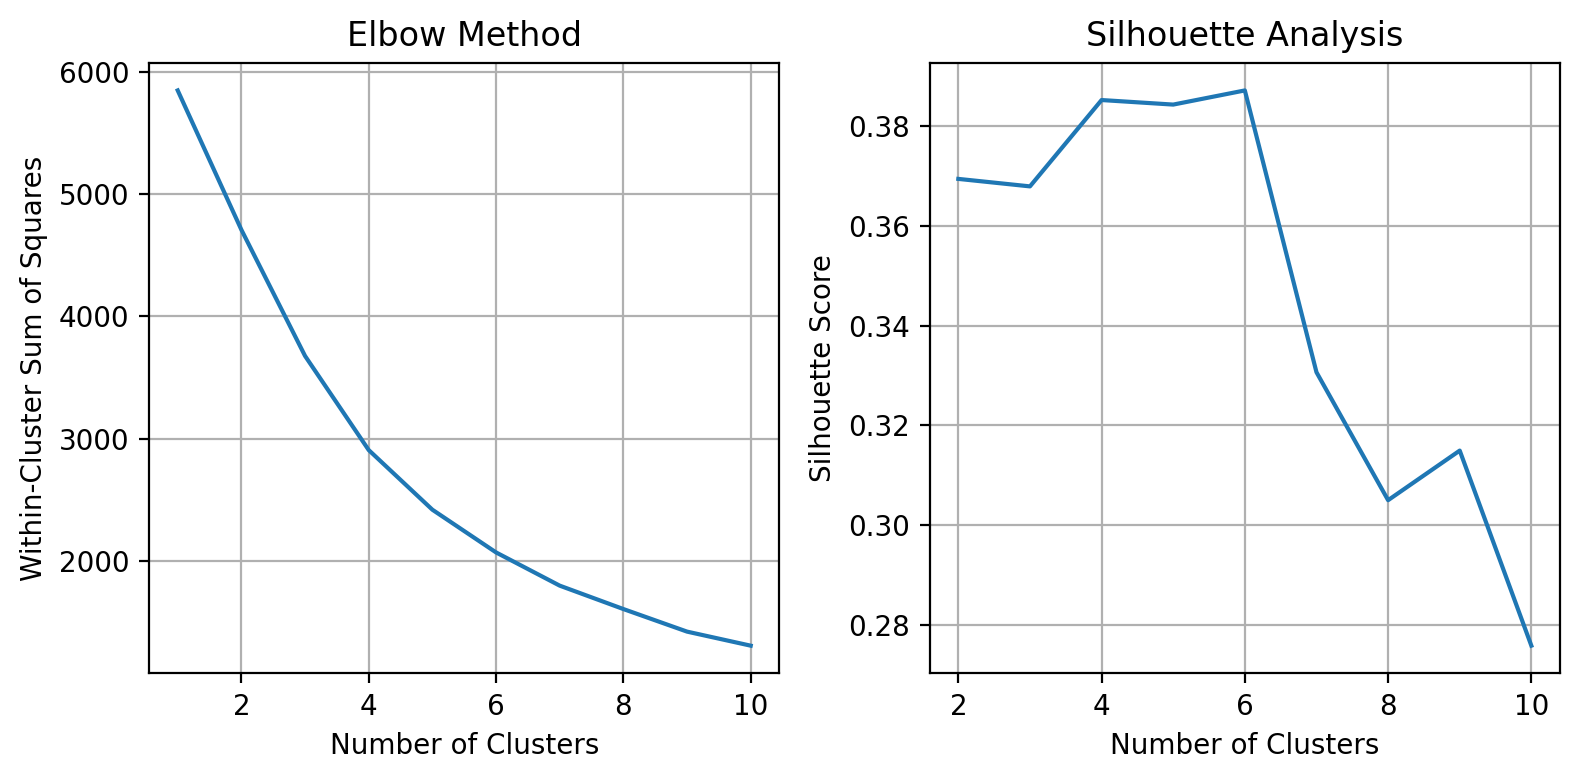

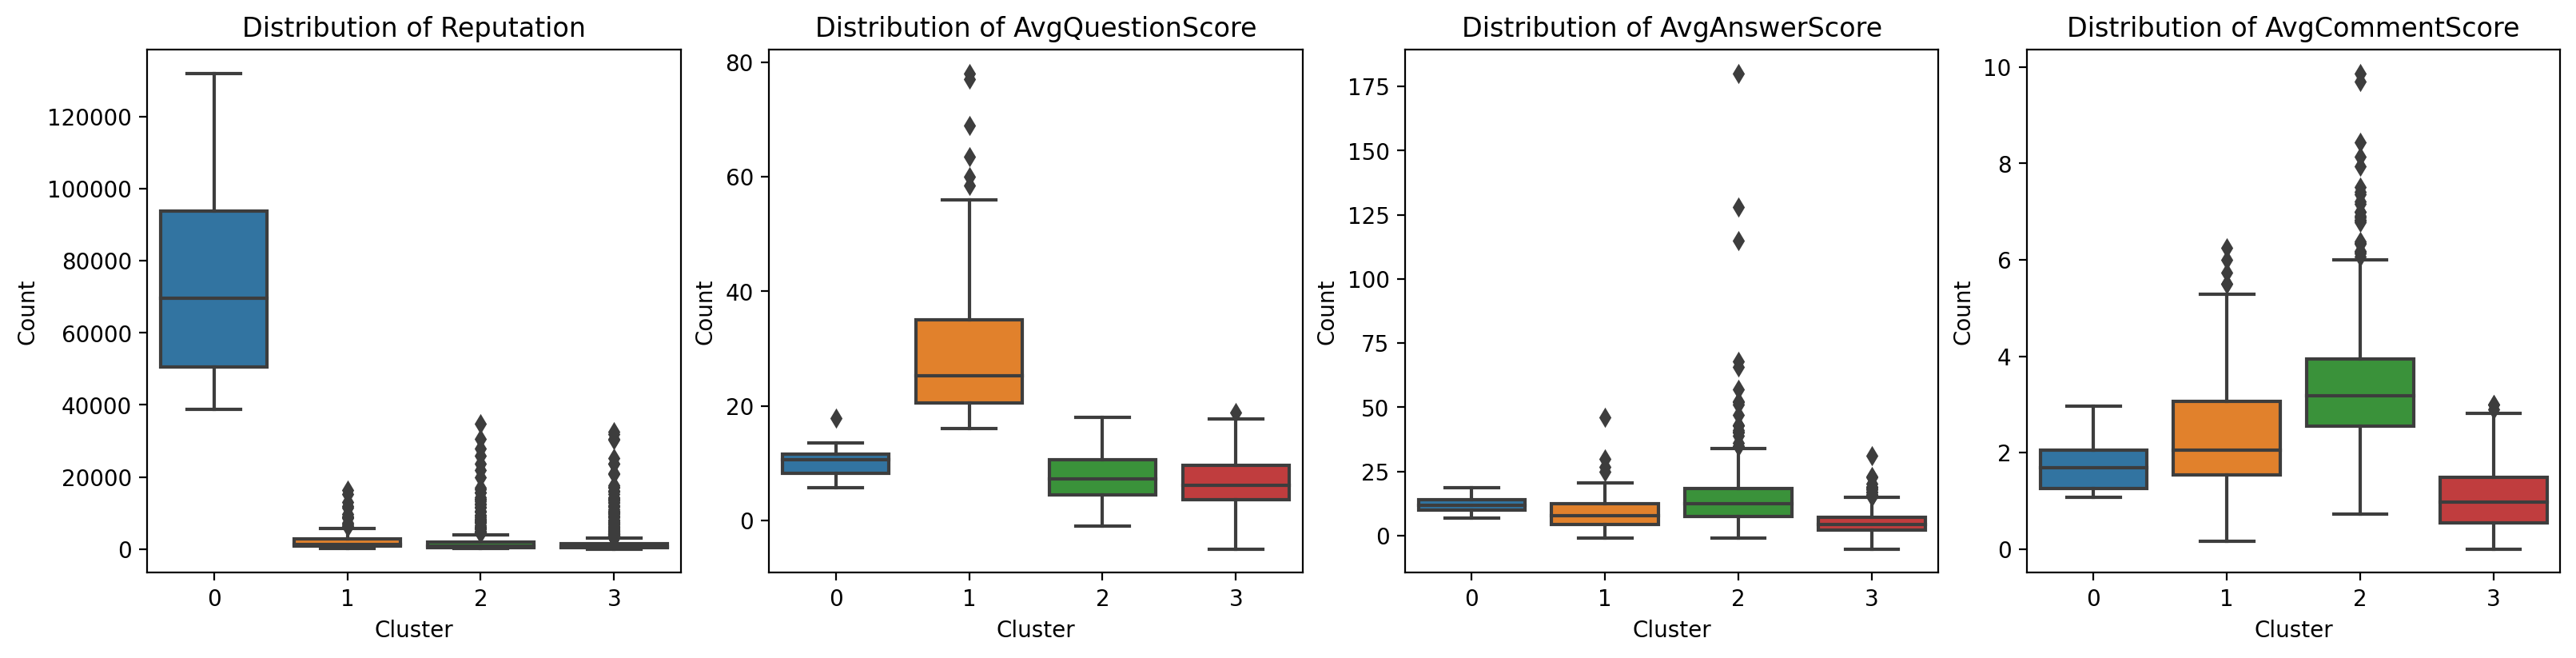

         Count  ReputationMean  AvgQuestionScoreMean  AvgAnswerScoreMean  \
Cluster                                                                    
0           16    74118.812500             10.385368           11.852085   
1          105     2632.095238             29.546801            9.559383   
2          409     2223.853301              7.573918           15.665143   
3          933     1711.833869              6.682733            4.977559   

         AvgCommentScoreMean  
Cluster                       
0                   1.729446  
1                   2.368631  
2                   3.436663  
3                   1.042431  


In [7]:
clustering_features = ['Reputation', 'AvgQuestionScore', 'AvgAnswerScore', 'AvgCommentScore']

custom_cluster(users_with_all_attributes, clustering_features, 4, 'Quality1Cluster', verbose=True)

#### 2.2 Clustering by accepted answer count and accepted answer fraction

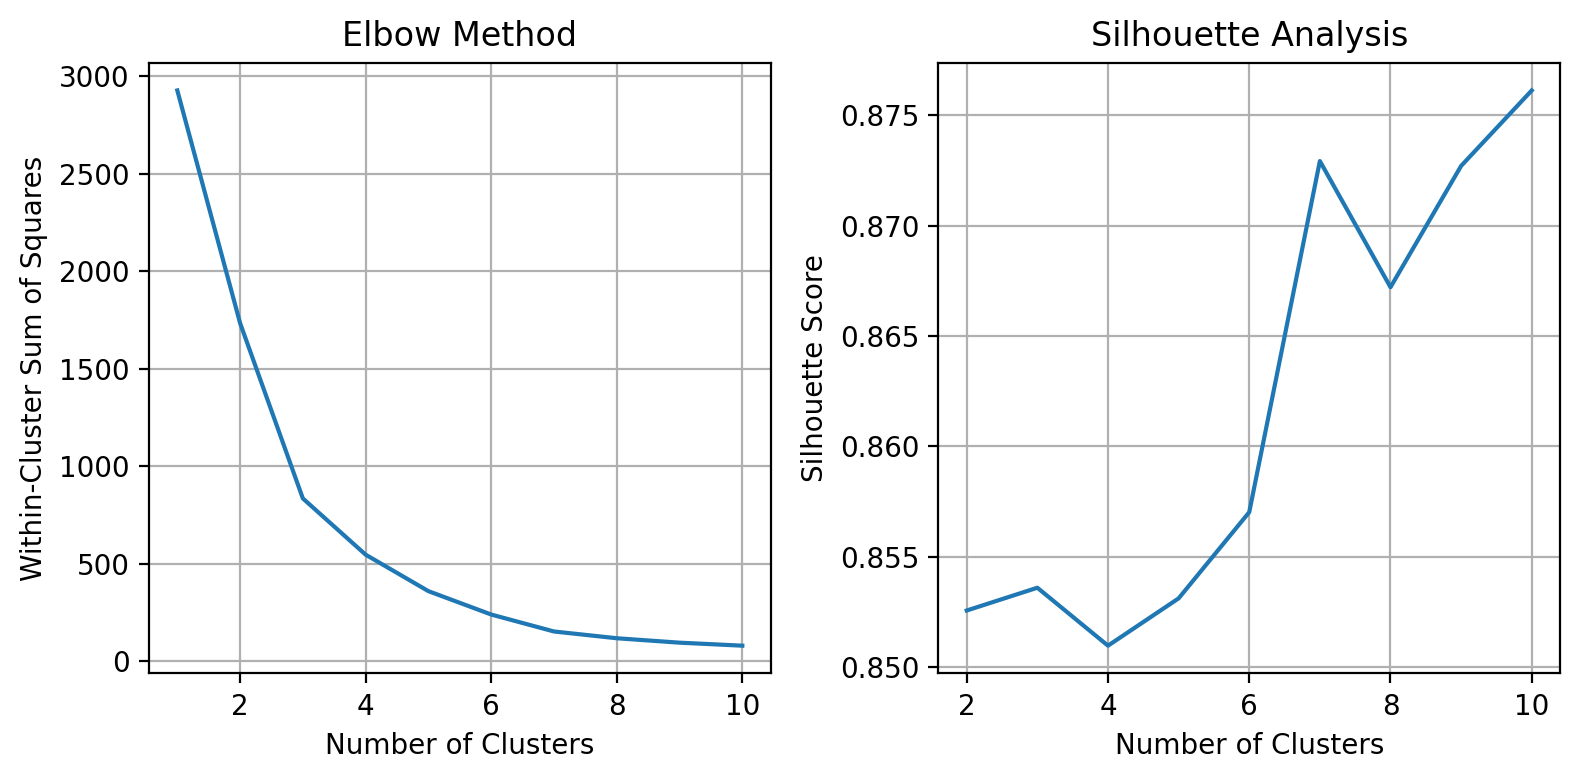

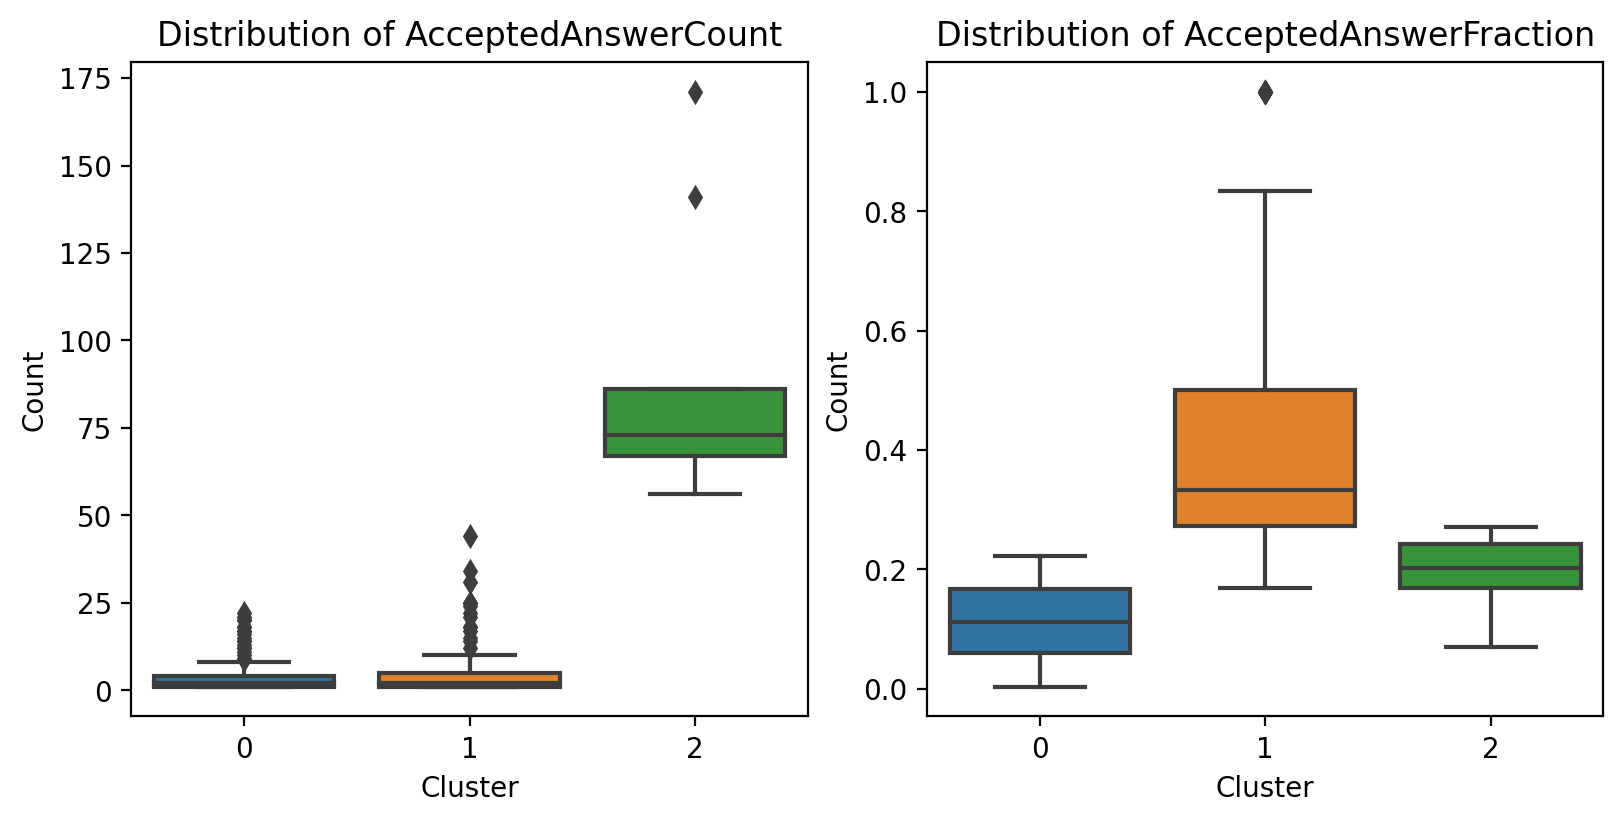

         Count  AcceptedAnswerCountMean  AcceptedAnswerFractionMean
Cluster                                                            
0         1334                 3.505102                    0.112406
1          120                 5.166667                    0.440166
2            9                88.888889                    0.187083


In [8]:
clustering_features = ['AcceptedAnswerCount', 'AcceptedAnswerFraction']

custom_cluster(users_with_all_attributes, clustering_features, 3, 'Quality2Cluster', verbose=True)

### 3. Clustering by Sentiment Metrics

#### 3.1 Clustering by average question body sentiment, average question title sentiment, average answer sentiment, average comment sentiment

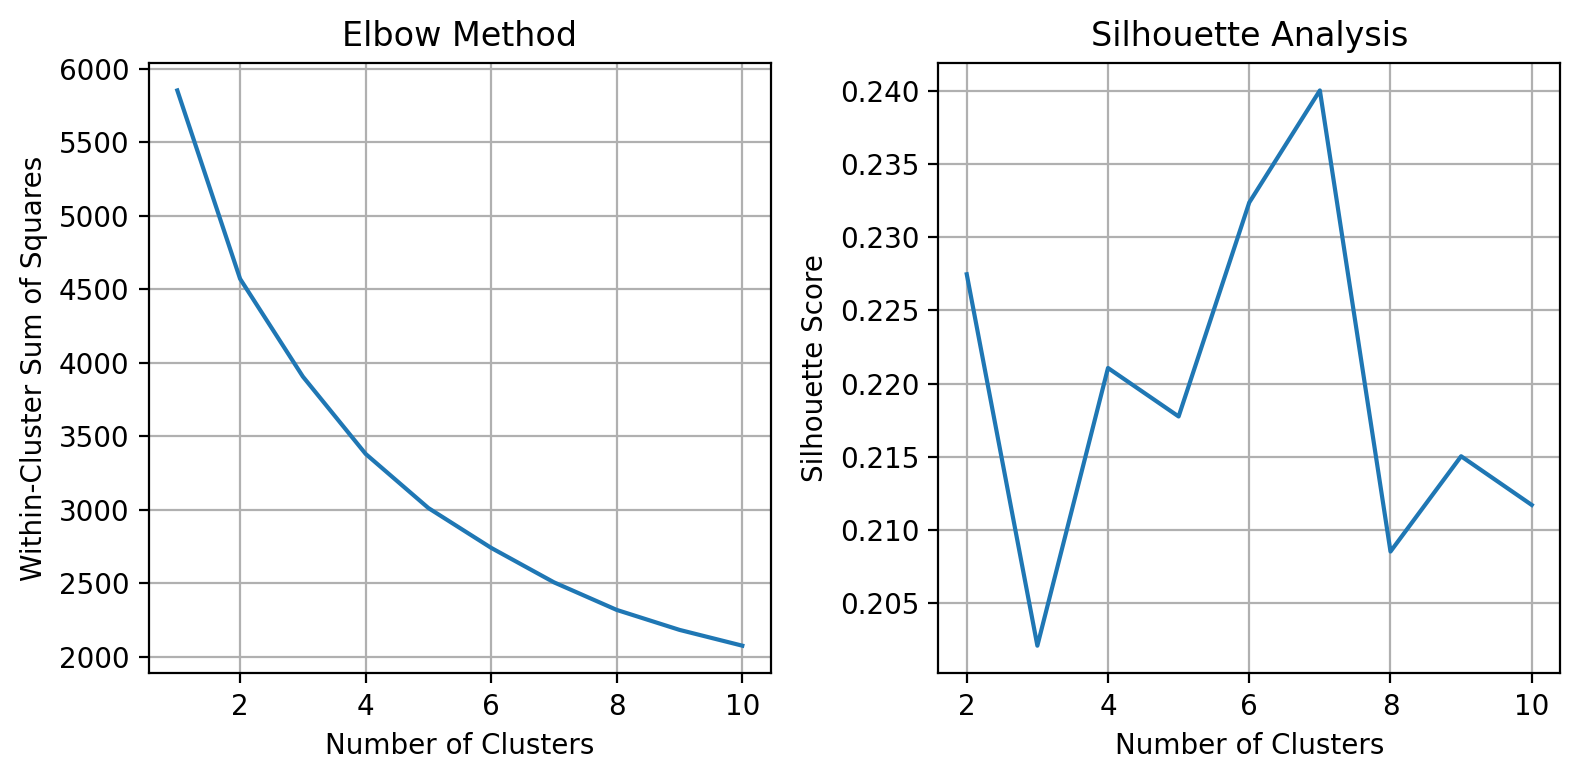

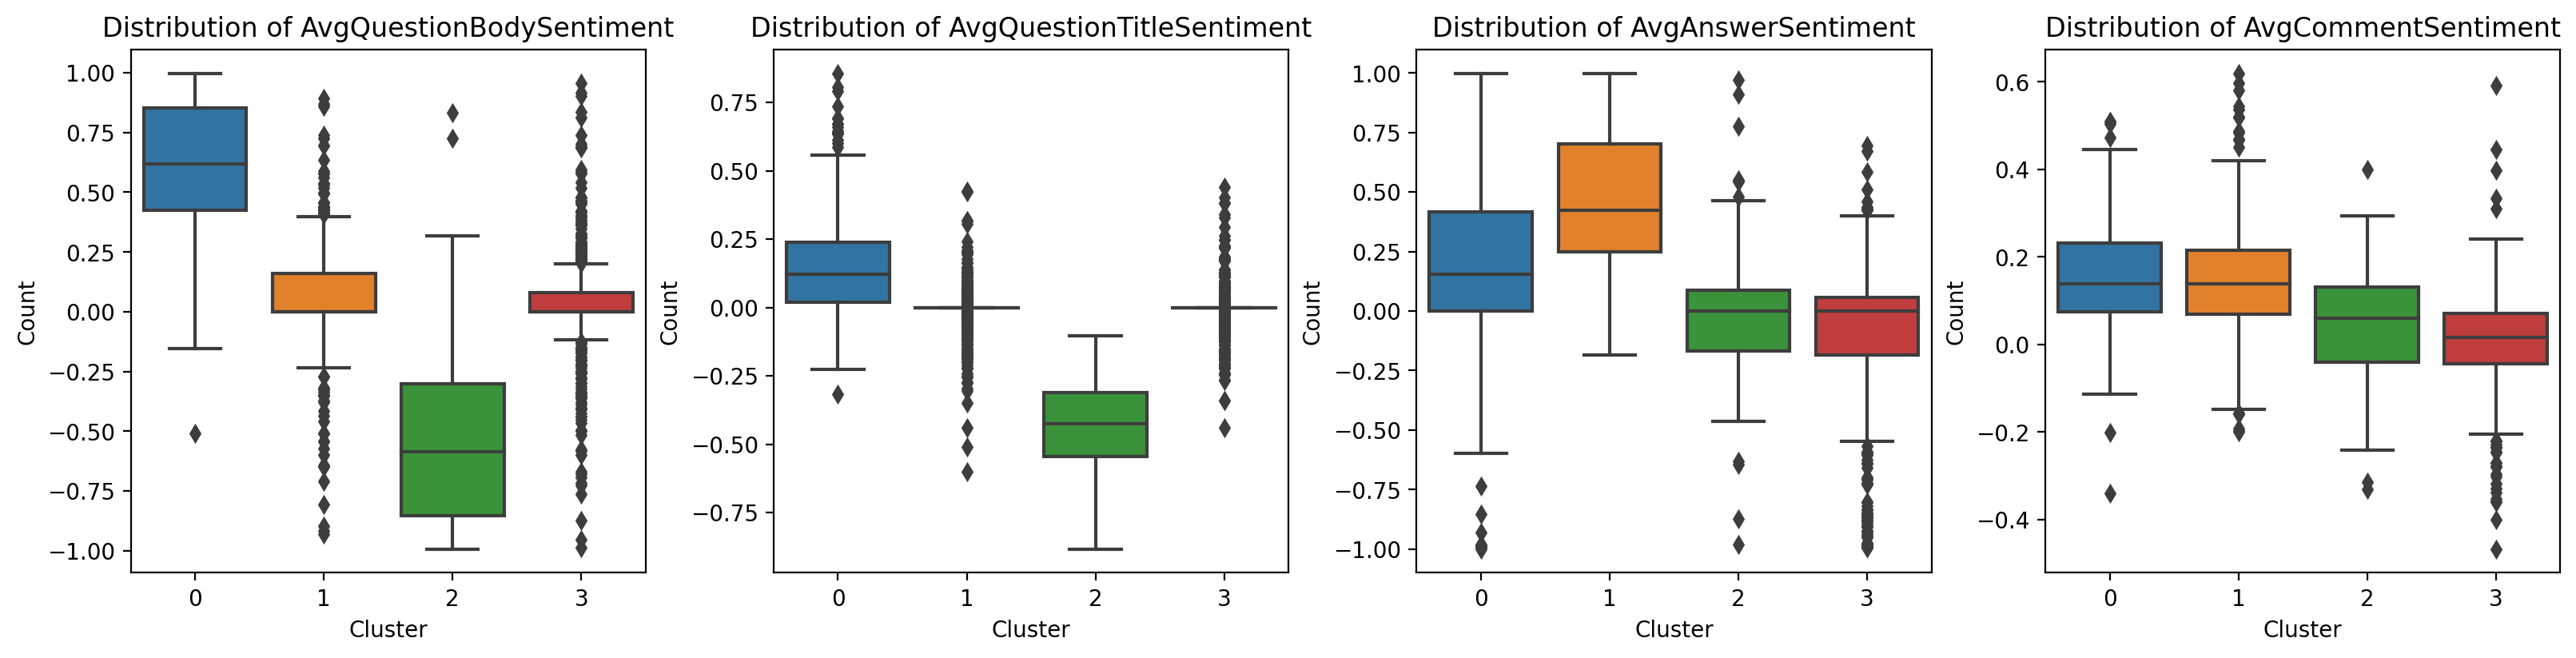

         Count  AvgQuestionBodySentimentMean  AvgQuestionTitleSentimentMean  \
Cluster                                                                       
0          321                      0.628099                       0.161663   
1          508                      0.058153                      -0.007225   
2           72                     -0.525177                      -0.441523   
3          562                      0.026148                      -0.004225   

         AvgAnswerSentimentMean  AvgCommentSentimentMean  
Cluster                                                   
0                      0.190884                 0.151958  
1                      0.462271                 0.144681  
2                      0.006057                 0.041924  
3                     -0.087617                 0.006856  


In [9]:
clustering_features = ['AvgQuestionBodySentiment', 'AvgQuestionTitleSentiment', 'AvgAnswerSentiment', 'AvgCommentSentiment']

custom_cluster(users_with_all_attributes, clustering_features, 4, 'SentimentCluster', verbose=True)

### 4. Clustering by Engagement Metrics

#### 4.1 Clustering by views, upvotes, and downvotes

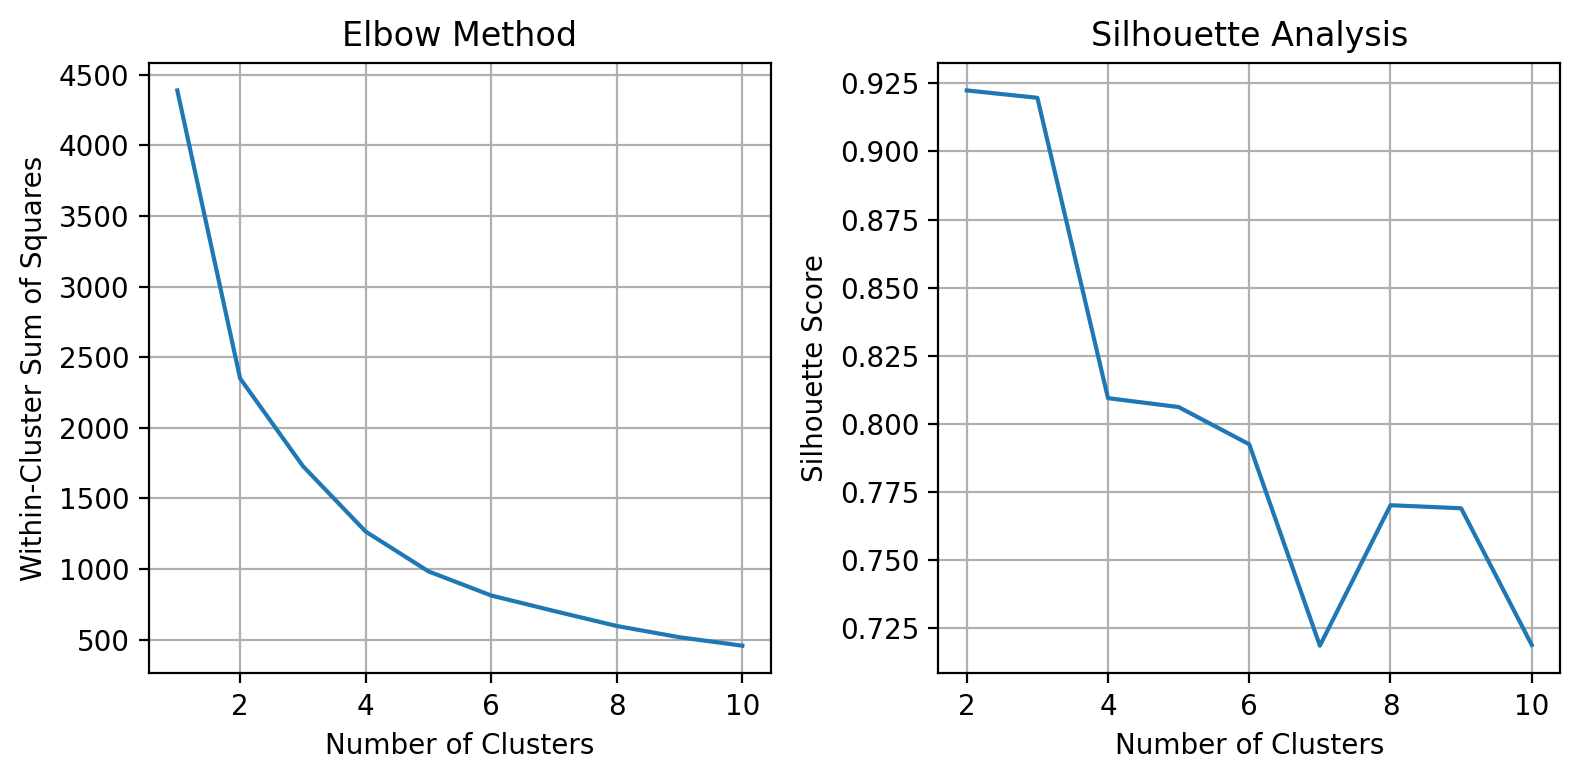

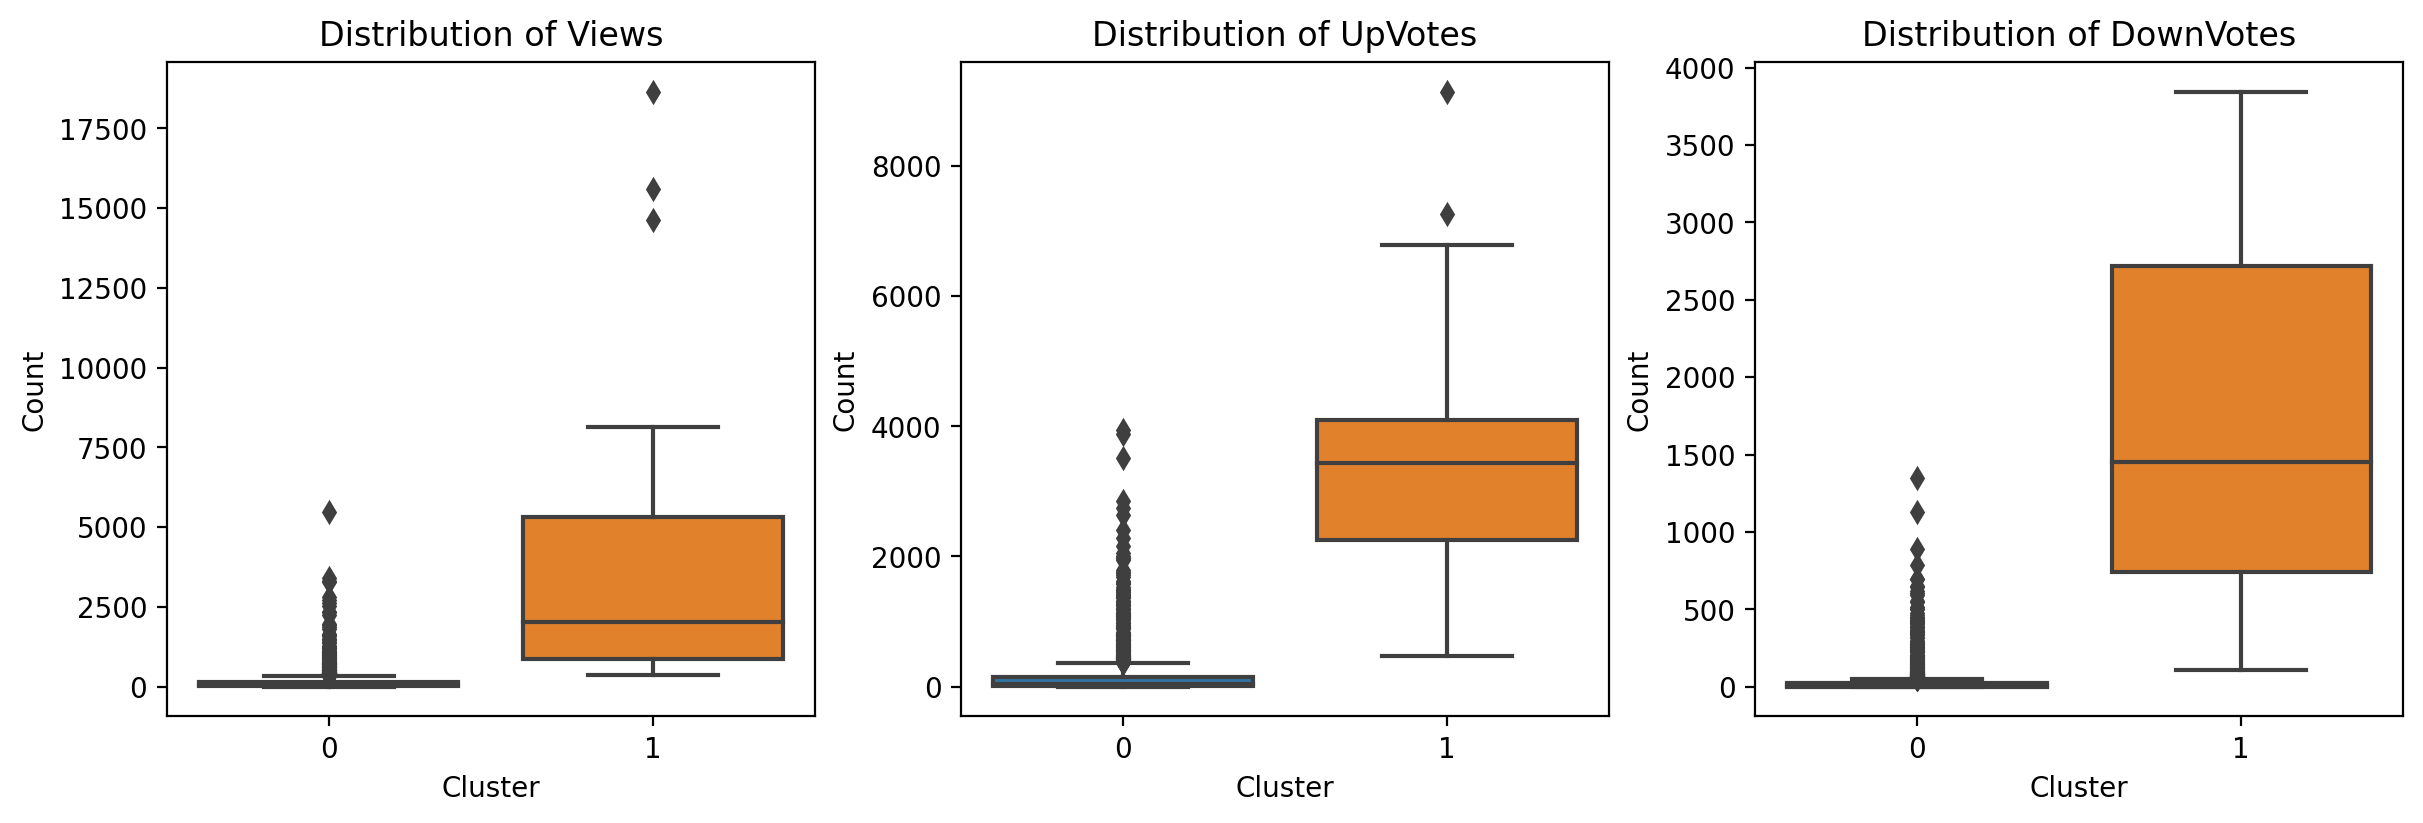

         Count    ViewsMean  UpVotesMean  DownVotesMean
Cluster                                                
0         1438   166.638387   176.061892      33.684284
1           25  4179.080000  3463.360000    1688.800000


In [10]:
clustering_features = ['Views', 'UpVotes', 'DownVotes']

custom_cluster(users_with_all_attributes, clustering_features, 2, 'EngagementCluster', verbose=True)

### 5. Clustering by Topic Engagement Metrics

#### 5.1 Clustering by topic engagement columns

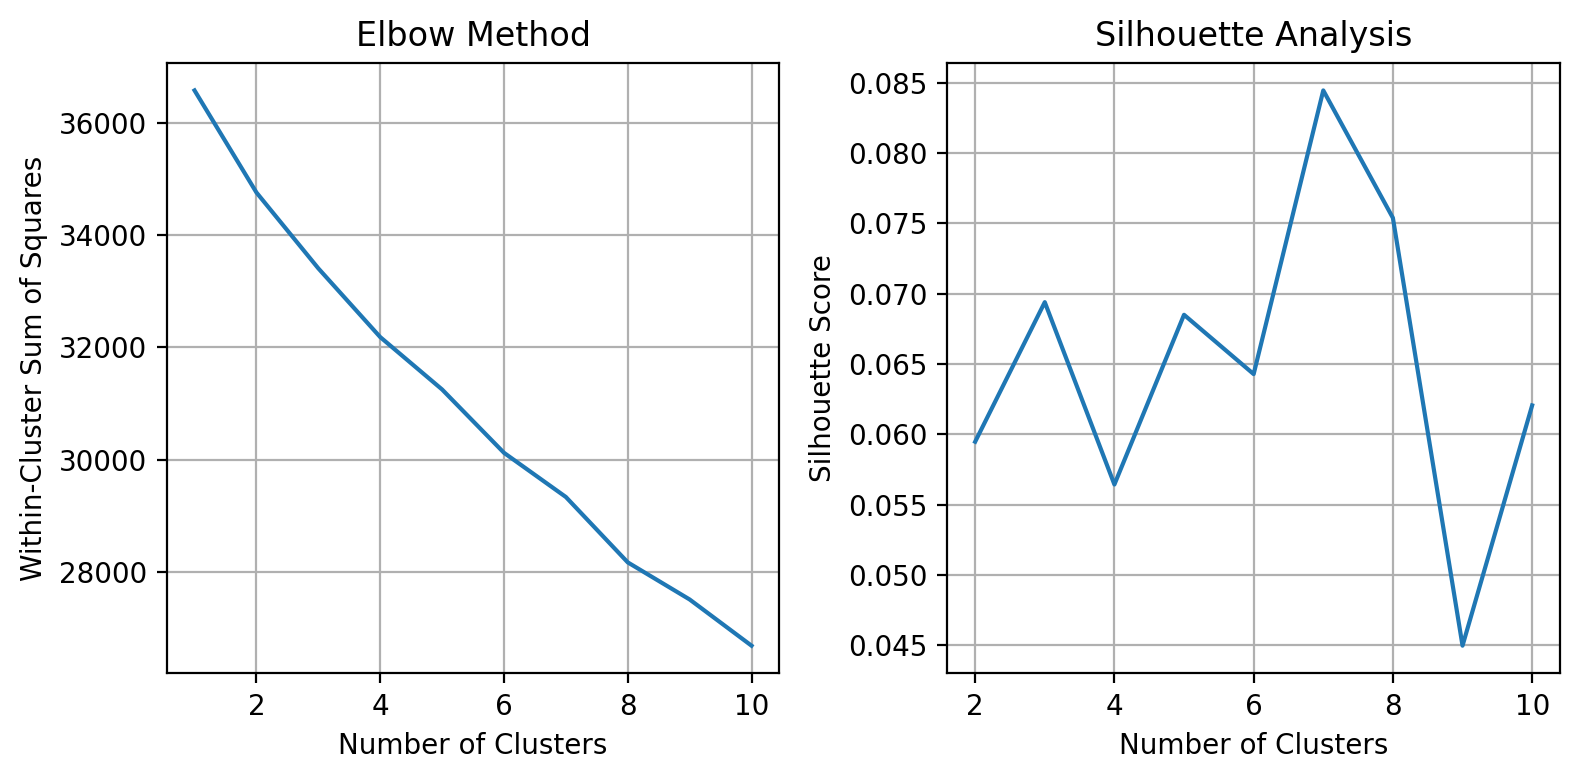

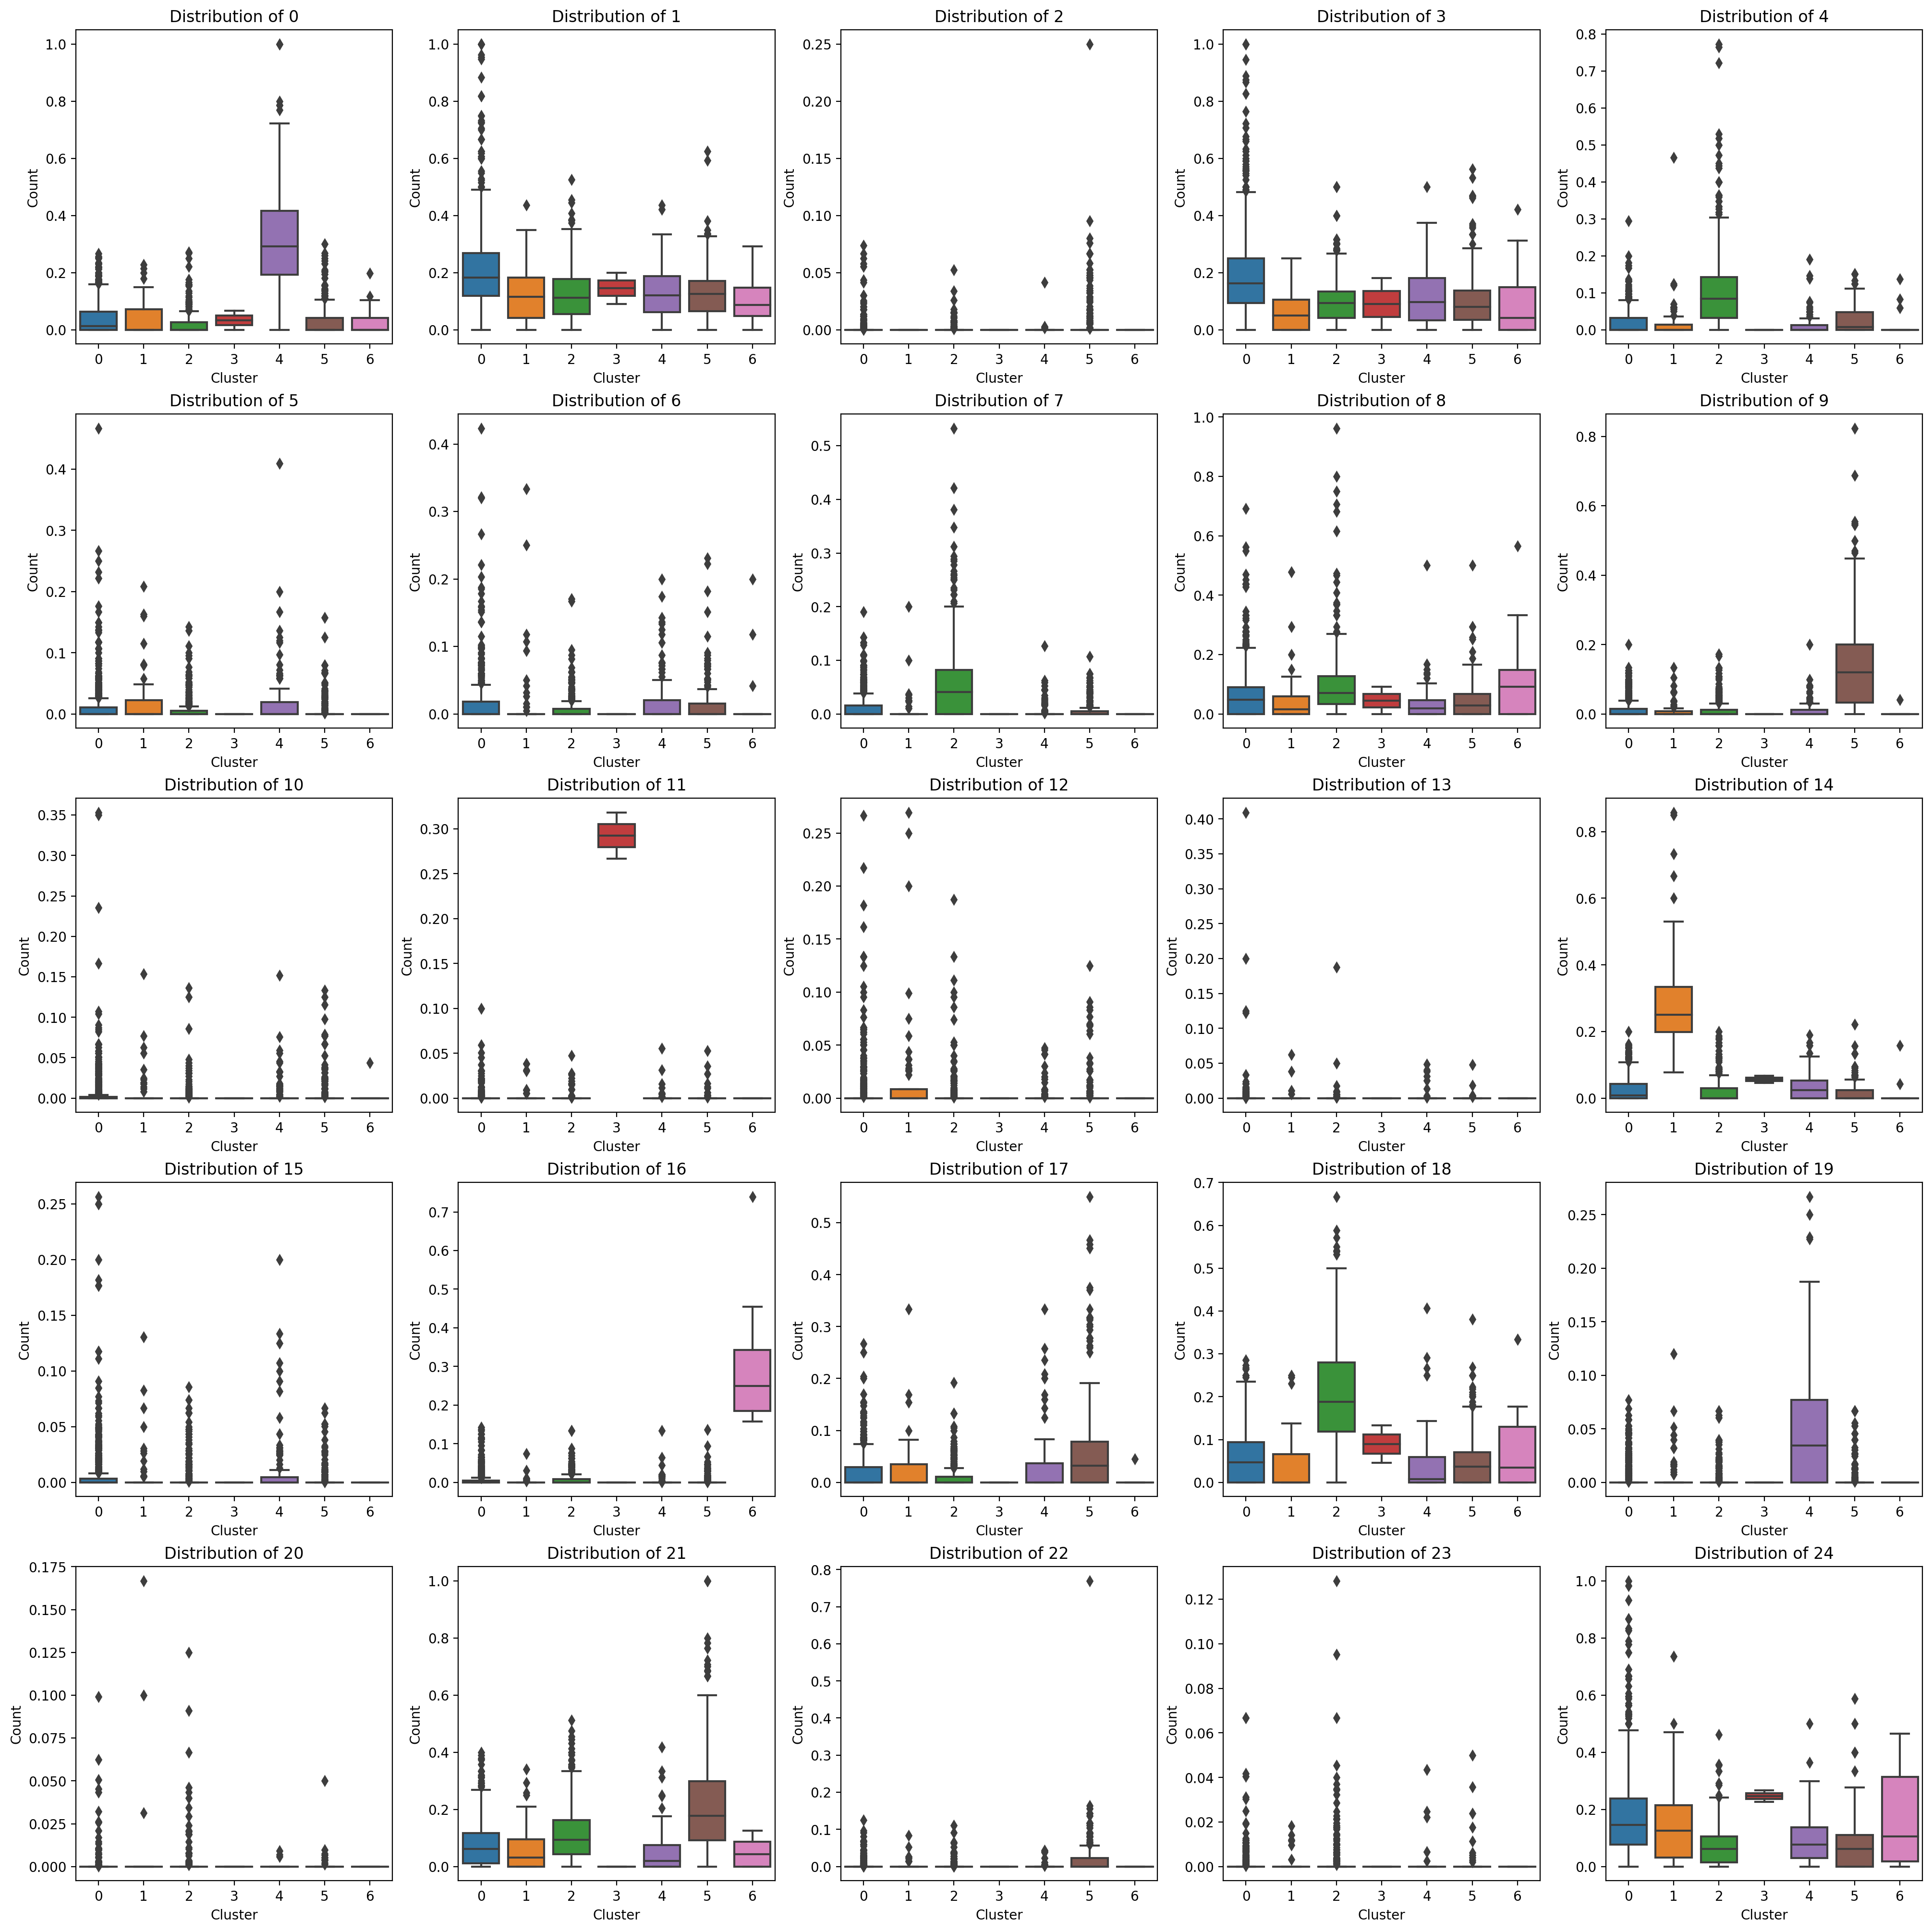

         Count     0Mean     1Mean     2Mean     3Mean     4Mean     5Mean  \
Cluster                                                                      
0          673  0.040636  0.214267  0.001232  0.192895  0.019033  0.013571   
1           61  0.042478  0.119670  0.000000  0.063199  0.020899  0.020801   
2          359  0.021508  0.123542  0.000819  0.099727  0.108573  0.007593   
3            2  0.033333  0.145455  0.000000  0.090909  0.000000  0.000000   
4          121  0.326476  0.132278  0.000402  0.116883  0.011635  0.021200   
5          232  0.034595  0.127380  0.007474  0.098763  0.027223  0.007049   
6           15  0.033414  0.105693  0.000000  0.100153  0.018673  0.000000   

            6Mean     7Mean     8Mean  ...    15Mean    16Mean    17Mean  \
Cluster                                ...                                 
0        0.015943  0.012588  0.067401  ...  0.008340  0.007532  0.019445   
1        0.017913  0.008219  0.047792  ...  0.007729  0.002175  0.024

In [11]:
clustering_features = list(range(25))

custom_cluster(users_with_all_attributes, clustering_features, 7, 'EngagementCluster', verbose=True)